In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from opti_graphs import *
from ipywidgets import interactive

plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('ggplot')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
X, y = artificial_points()

In [3]:
y.shape

(100, 1)

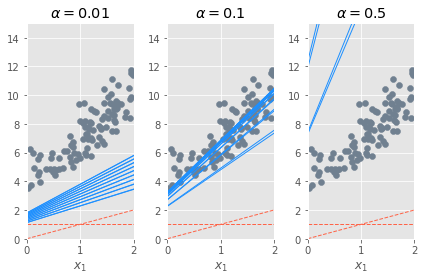

In [4]:
for i, n in enumerate([0.01,0.1, 0.5]):
    plt.subplot(1, 3, i + 1)
    batch_gd_plot(X, y, theta=1, alpha=n)
    plt.tight_layout()

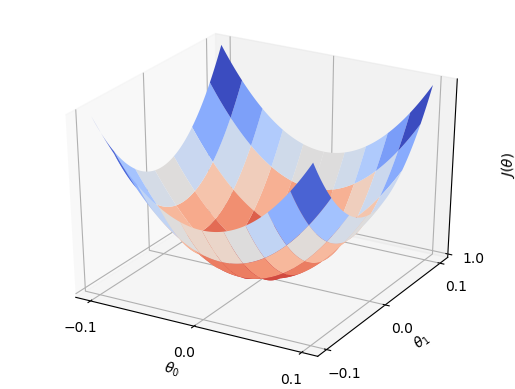

In [5]:
plt.style.use('default')
global_surface()

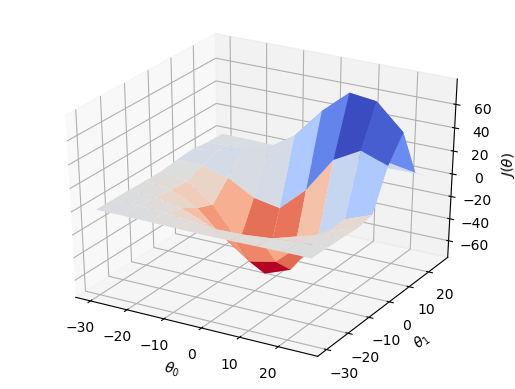

In [6]:
plt.style.use('default')
max_min_surface()

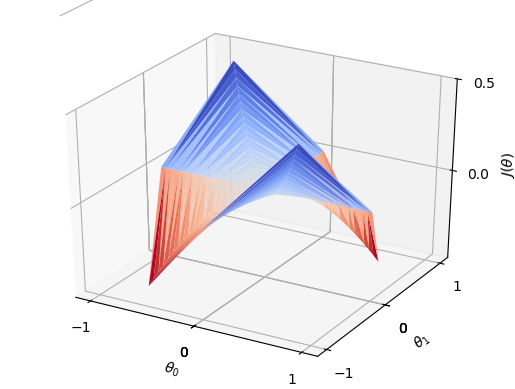

In [7]:
plt.style.use('default')
saddle_surface()

In [8]:
interactive(gradient_1d, alpha = (1,6))

interactive(children=(IntSlider(value=1, description='alpha', max=6, min=1), Output()), _dom_classes=('widget-…

In [9]:
 interactive(gradient_2d, alpha = (0.01,3))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=0.01), Output()), _dom_classes=…

In [10]:
# generamos los imports básicos de Keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import LambdaCallback
from keras.optimizers import SGD
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Realizamos un dataset con 500 muestras,
# 20 atributos y un vector objetivo con 2 clases
X, y = make_classification(n_samples = 500)
# generamos la división en conjuntos de entrenamiento/validación
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=11238)

In [11]:
sgd = SGD(lr=0.01, # Tasa de aprendizaje
          momentum=0, #Obviamos momento
          decay=0, # obviamos decaimiento de los pesos
          nesterov=False) #Obviamos momento de nesterov

In [12]:
# generamos un objeto que nos permita acoplar capas
model = Sequential()
model.add(Dense(20, # agregamos una capa densa con 20 neuronas
                input_dim=20, # 20 atributos de entrada
                activation='softmax')) # y una activación softmax
# compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd)

In [13]:
# vamos a preservar los parámetros
weights = []
# Preservaremos todos los parámetros al finalizar una época de entrenamiento
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: weights.append(model.layers[0].get_weights()))

In [14]:
# entrenamos el modelo
model.fit(X_train, y_train, # conjunto de entrenamiento
          batch_size=X_train.shape[0], # definimos la cantidad de datos a ingresar
         epochs=100, # la cantidad de iteraciones de entrenamiento.
          verbose=0, # no deseamos implementar un reporte insitu
         validation_data=(X_test, y_test),
          # incluimos nuestro callback
         callbacks=[print_weights])

Instructions for updating:
Use tf.cast instead.


In [15]:
# extraemos los coeficientes
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

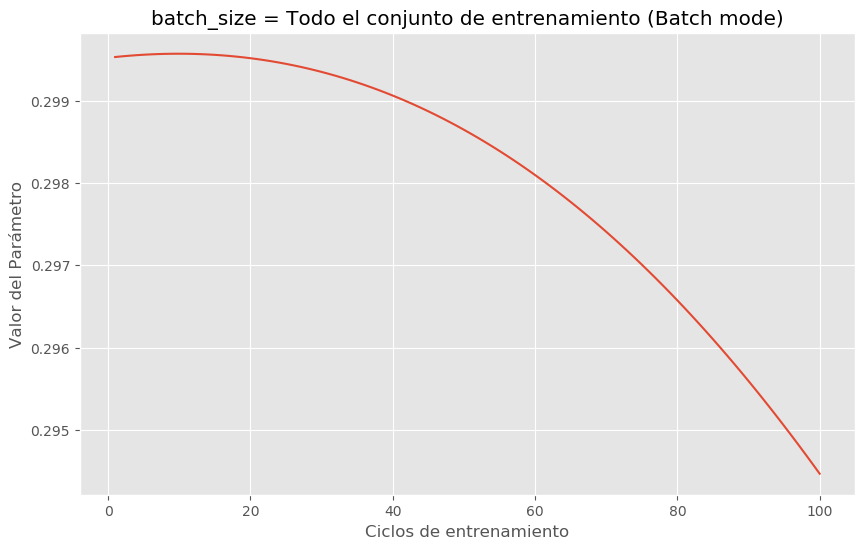

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 100, 100), w_all_data)
plt.xlabel('Ciclos de entrenamiento');
plt.ylabel('Valor del Parámetro');
plt.title('batch_size = Todo el conjunto de entrenamiento (Batch mode)');

In [17]:
weights = []
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: weights.append(model.layers[0].get_weights()))

model.fit(X_train, y_train,
          batch_size=64, # fijamos la cantidad de datos en cada batch
          epochs=100, #aumentamos la cantidad de ciclos de entrenamiento.
          verbose=0,
          validation_data=(X_test, y_test),
         callbacks=[print_weights])
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

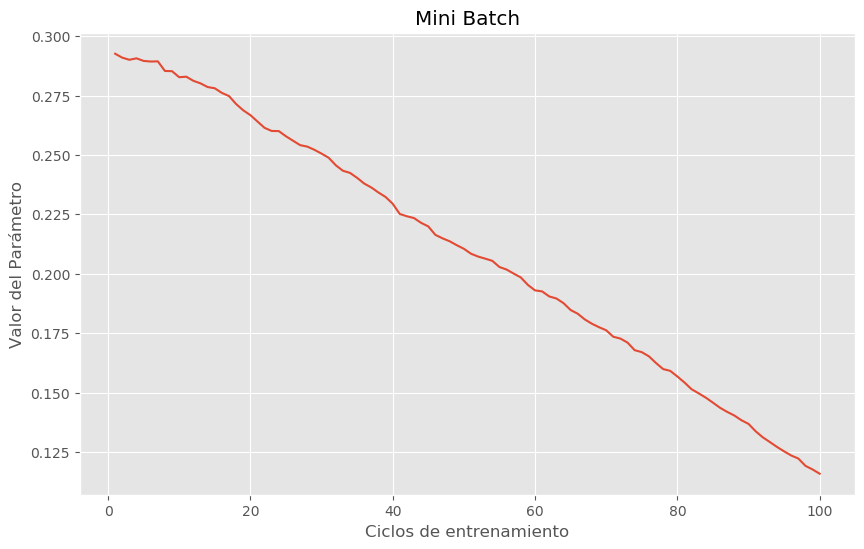

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 100, 100), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('Mini Batch');

In [19]:
weights = []
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs:
weights.append(model.layers[0].get_weights()))
model.fit(X_train, y_train,
          batch_size=1, # fijamos la cantidad de datos a entrenar.
          epochs=1000, # mantenemos la cantidad de épocas a entrenar en 1000.
          verbose=0,
          validation_data=(X_test, y_test),
         callbacks=[print_weights])
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in
weights]]]

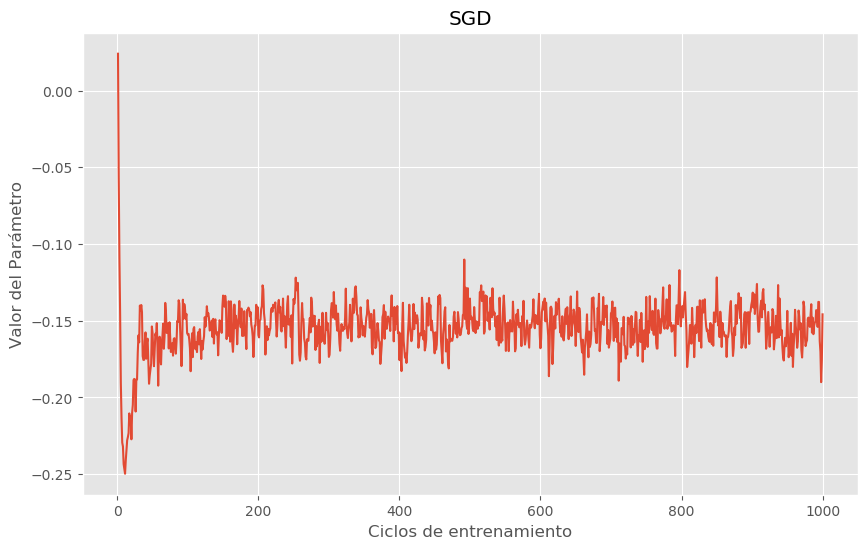

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('SGD');

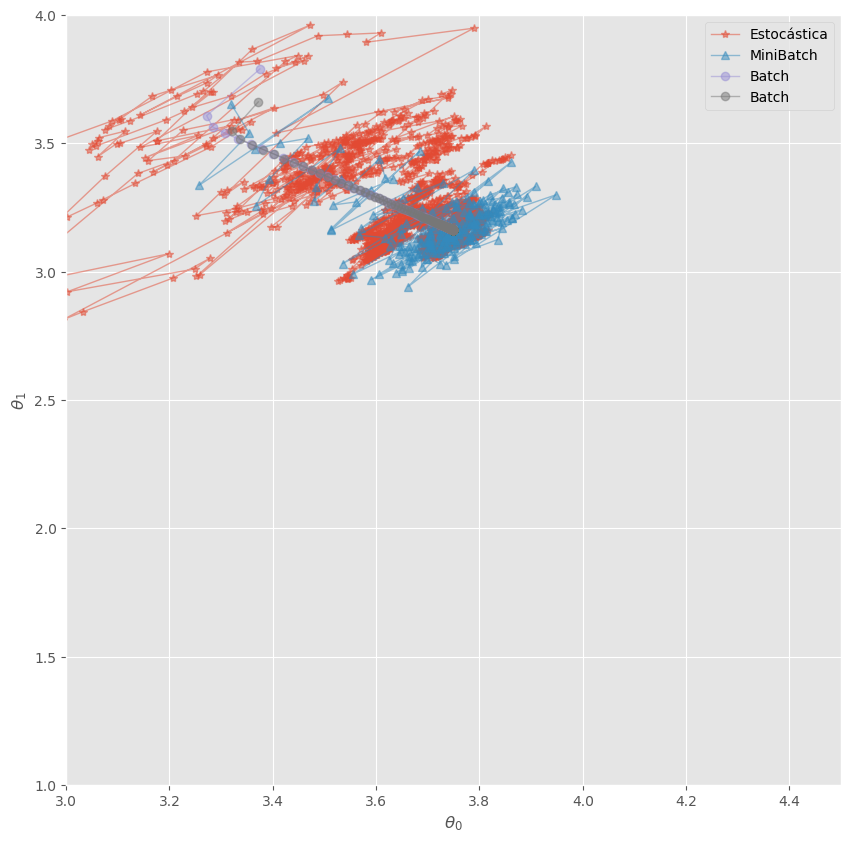

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
X, y = artificial_points()
batch_gd = batch_gd_plot(X, y, theta=1, alpha=.2, theta_path=True)
stochastic_gd = stochastic_gd_plot(X, y, theta_path=True)
minibatch_gd = mini_batch_gd_plot(X, y, theta=1, alpha=.2, theta_path=True)
compare_gd_strategies(batch_gd, stochastic_gd, minibatch_gd)